The goal of this notebook is to prepare a set of images of arrows for which we will apply some group transformations, more precisely, rotation, translation about the x-axis and translation about the y-axis. Then we will save the transformed arrow images as vector embedded dataset (simple embedding, only reshaping the gray scale matrix) and try to visually identify which symmetry set the specific vector belonged to.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Make images of arrows and save them

Again, we have two sets of symmetries for the arrows: rotations about its base (rot), translation in the horizontal direction (x-trans) and translation on the vertical direction (y-trans).

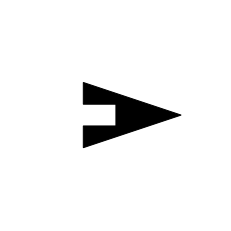

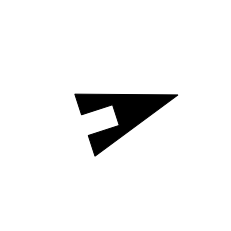

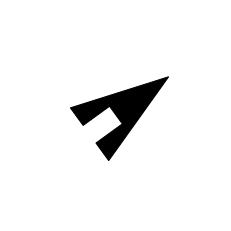

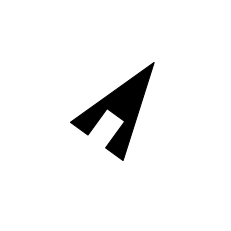

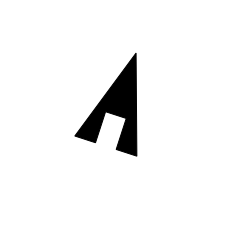

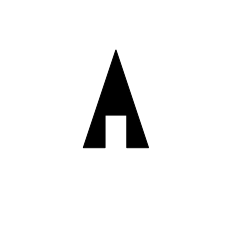

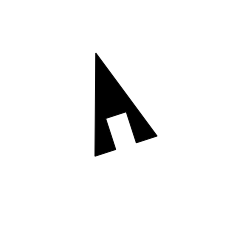

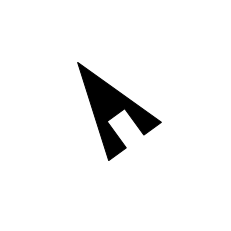

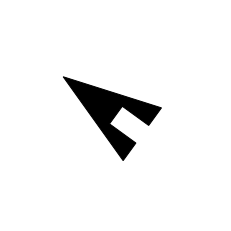

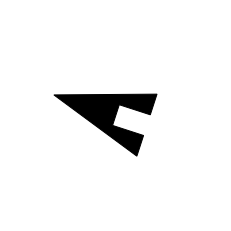

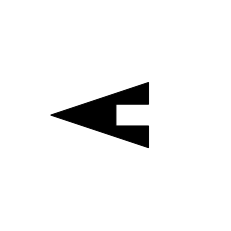

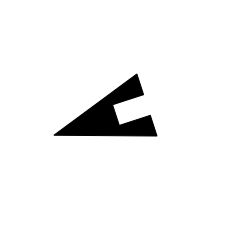

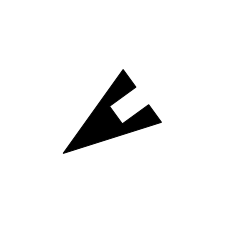

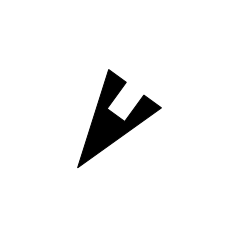

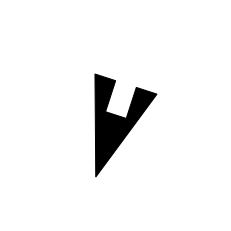

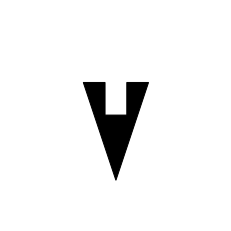

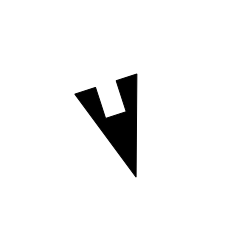

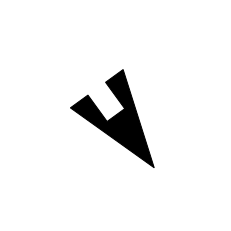

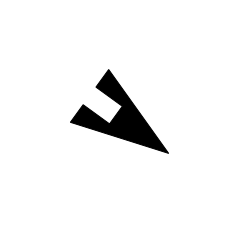

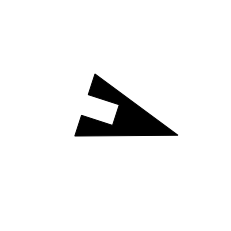

In [2]:
for value in range(0,20):
    fig, ax = plt.subplots()

    ax.arrow(0.5,0.5,0.3*np.cos(np.pi*value/10),0.3*np.sin(np.pi*value/10), width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box') #make scale of axes as similar as possible
    plt.axis('off')  
    plt.draw()

    plt.savefig('rot'+str(value)+'.png', dpi=50) #dpi controls the number of pixels used

I performed a brute force transformation to grayscale (no need to worry about 3 channels and more complex image embedding for now, which really makes life easier). Idea on how to perform it from https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

from matplotlib.image import imread

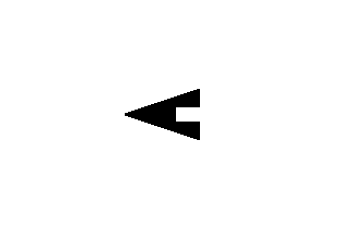

(200, 300)

In [4]:
image = imread('rot10.png')
gray = rgb2gray(image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.show()
np.shape(gray)

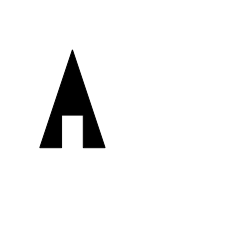

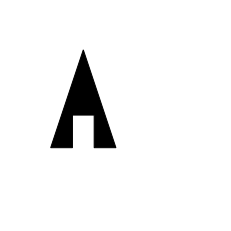

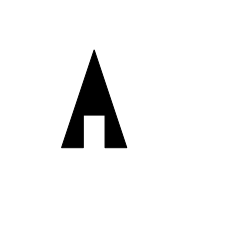

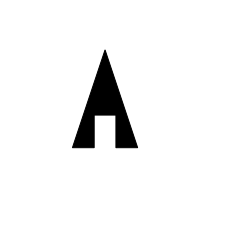

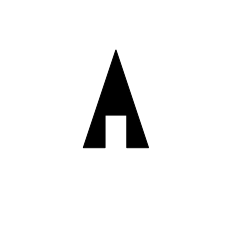

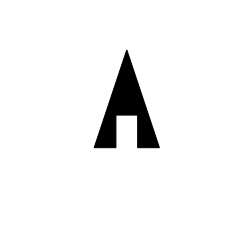

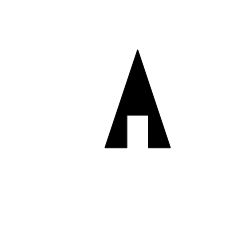

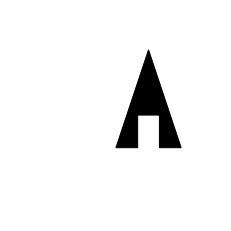

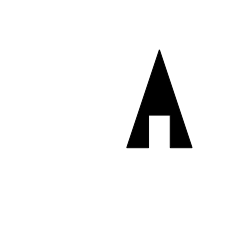

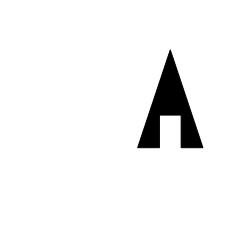

In [5]:
for value in range(0,10): 
    fig, ax = plt.subplots()

    ax.arrow(0.3+value*0.05,0.5,0,0.3, width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')  
    plt.draw()
    plt.savefig('x_trans'+str(value)+'.png', dpi=50)

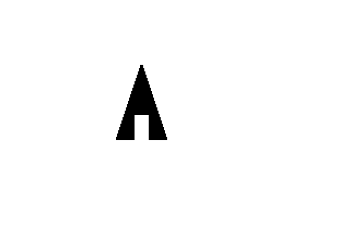

(200, 300)

In [6]:
image = imread('x_trans0.png')
gray = rgb2gray(image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.show()
np.shape(gray)

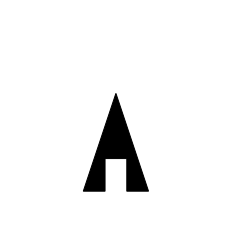

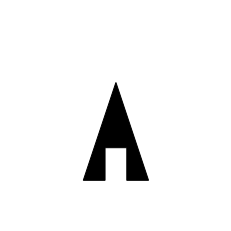

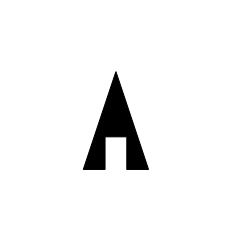

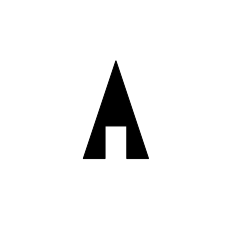

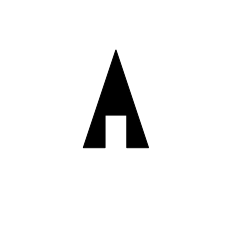

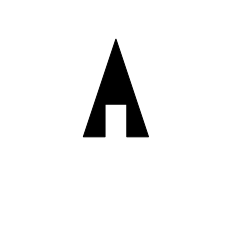

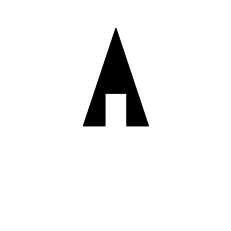

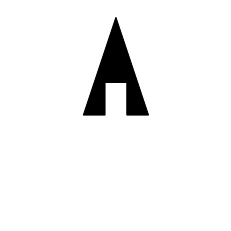

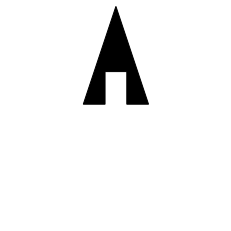

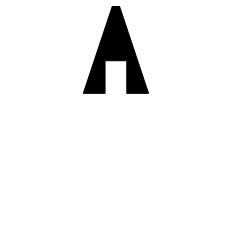

In [7]:
for value in range(0,10):    
    fig, ax = plt.subplots()

    ax.arrow(0.5,0.3+0.05*value,0,0.3, width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')  
    plt.draw()
    plt.savefig('y_trans'+str(value)+'.png', dpi=50)

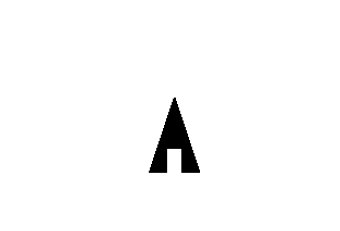

(200, 300)

In [8]:
image = imread('y_trans0.png')
gray = rgb2gray(image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.show()
np.shape(gray)

# Make the images into a dataset

We make datasets of simple vectorized embedding of the images as well as label them according to the symmetry class they belong to

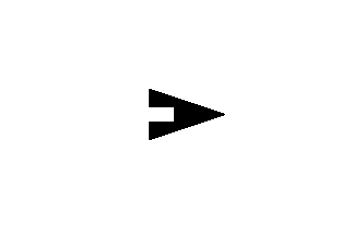

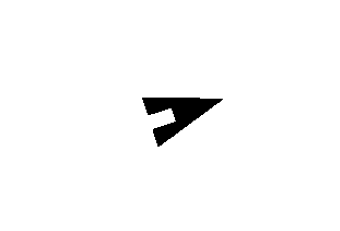

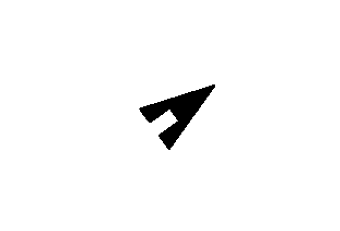

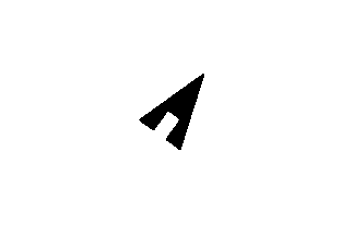

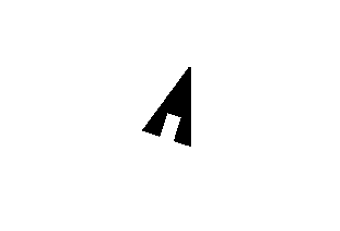

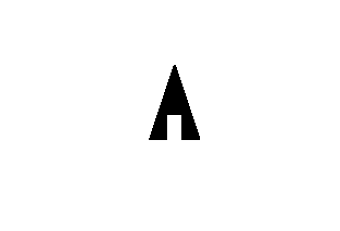

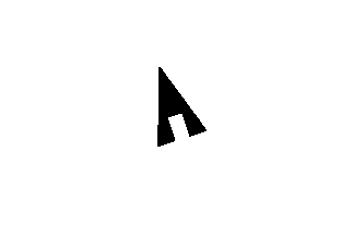

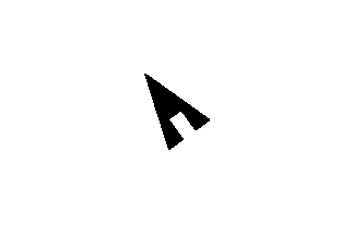

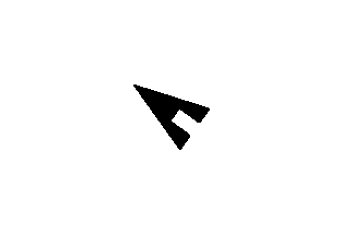

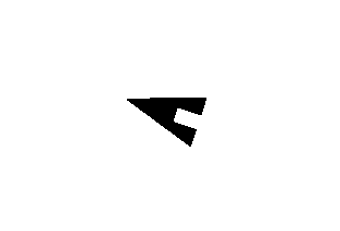

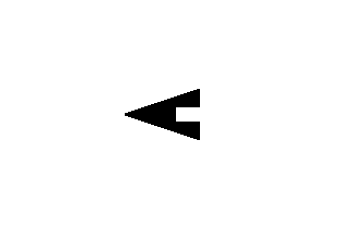

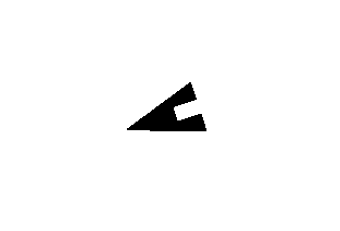

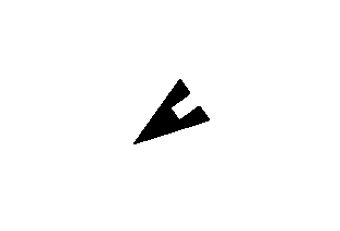

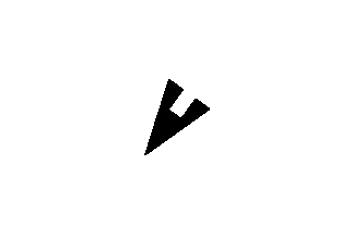

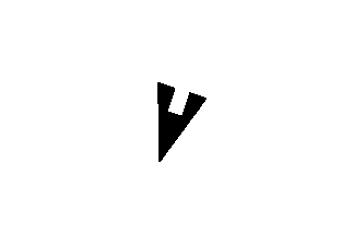

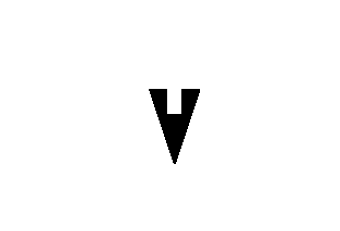

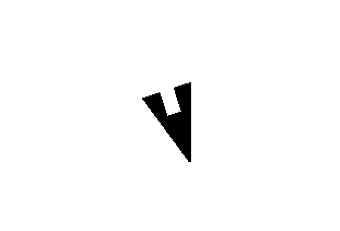

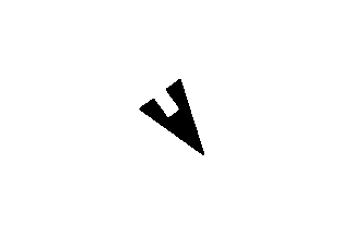

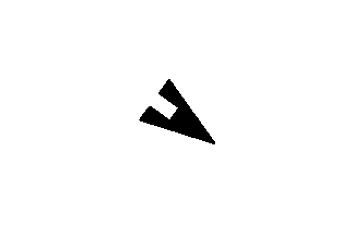

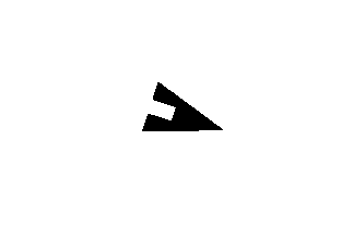

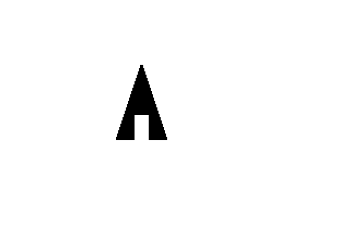

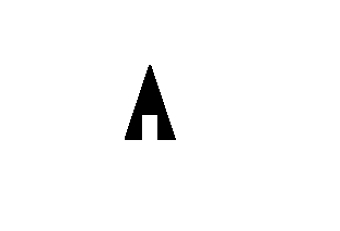

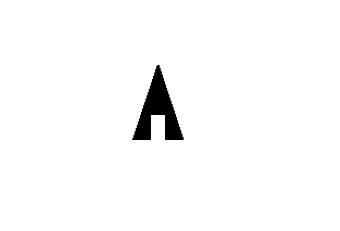

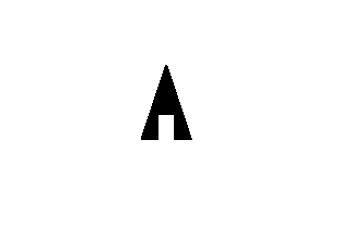

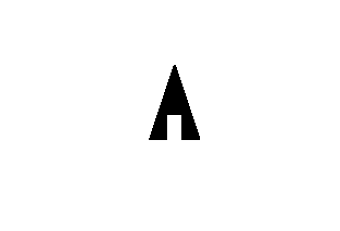

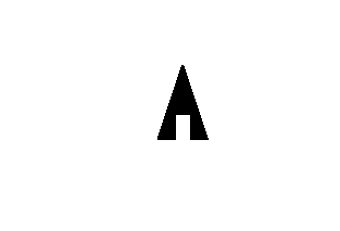

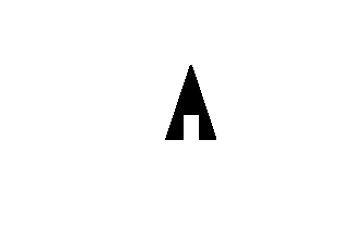

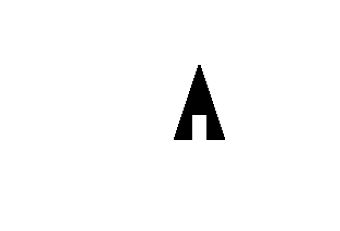

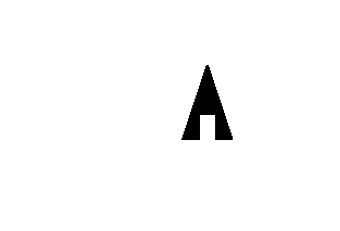

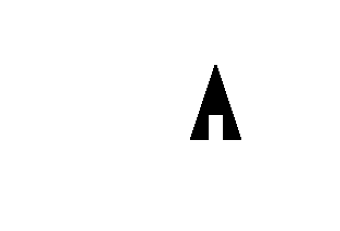

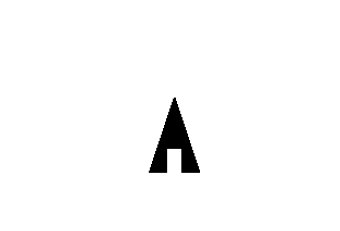

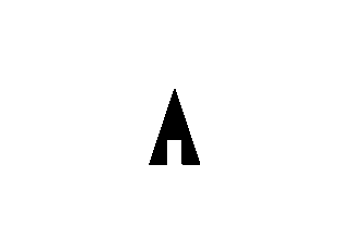

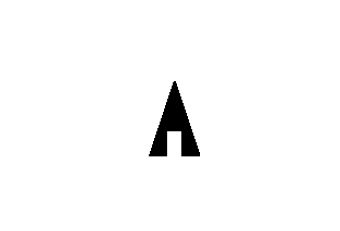

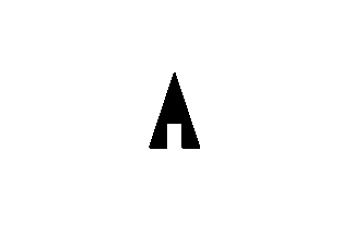

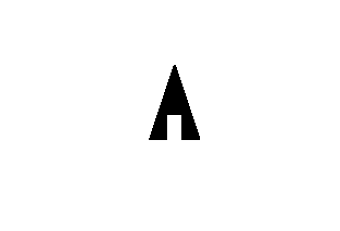

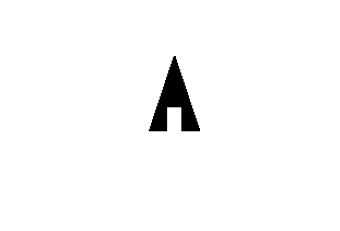

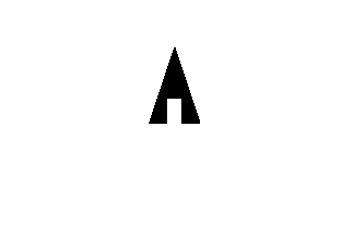

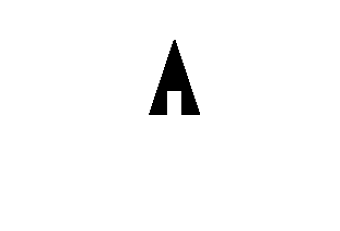

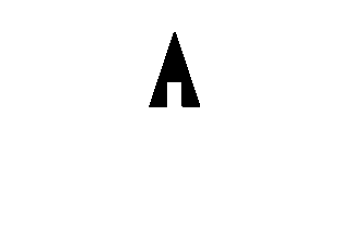

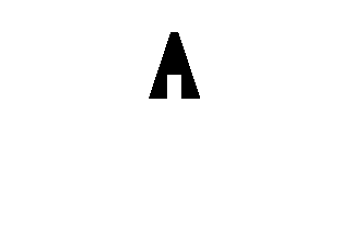

In [9]:
rot_dataset = []
for value in range(0,20):
    image = imread('rot'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    rot_dataset.append(gray.reshape(-1))

label_rot = []
for i in range(len(rot_dataset)):
    label_rot.append(0)
    
    
x_trans_dataset = []
for value in range(0,10):
    image = imread('x_trans'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    x_trans_dataset.append(gray.reshape(-1))
     
label_x_trans = []
for i in range(len(x_trans_dataset)):
    label_x_trans.append(1)   


y_trans_dataset = []
for value in range(0,10):
    image = imread('y_trans'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    y_trans_dataset.append(gray.reshape(-1))

label_y_trans = []
for i in range(len(y_trans_dataset)):
    label_y_trans.append(2) 

In [10]:
full_dataset = rot_dataset + x_trans_dataset + y_trans_dataset
full_label = label_rot + label_x_trans + label_y_trans

In [11]:
len(full_dataset), len(full_label)

(40, 40)

# PCA study

So that we can check whether or not there is some visible identification of the transformations embedding in the dataset, we PCA the data and investigate it

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(full_dataset)

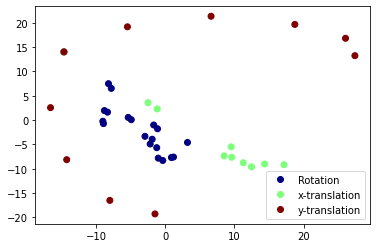

In [13]:
classes = ['Rotation', 'x-translation', 'y-translation']
scatter = plt.scatter(data[:,0],data[:,1], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [14]:
pca = PCA(n_components=3)
data = pca.fit_transform(full_dataset)

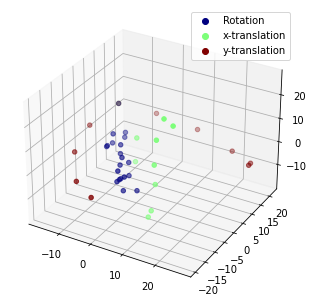

In [15]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

classes = ['Rotation', 'x-translation', 'y-translation']
scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

Strangely, y translation looks much more cyclic than rotation. Let us check if this is caused by PCA rather than some actually embedded information by comparing it to ISOMAP

# ISOMAP study

In [16]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
data = embedding.fit_transform(full_dataset)

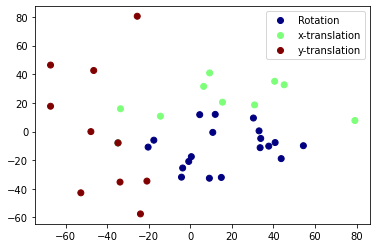

In [17]:
classes = ['Rotation', 'x-translation', 'y-translation']
scatter = plt.scatter(data[:,0],data[:,1], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [18]:
embedding = Isomap(n_components=3)
data = embedding.fit_transform(full_dataset)

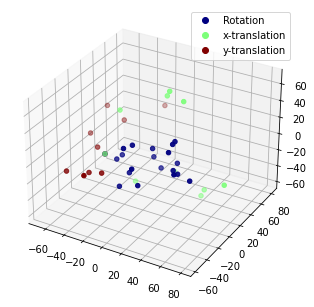

In [19]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

classes = ['Rotation', 'x-translation', 'y-translation']
scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

Makes more sense!